<a href="https://colab.research.google.com/github/mvslopes/Pyspark_Estudos/blob/main/Sprint_03_Configura%C3%A7%C3%A3o_do_NIFI_parte_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SPRINT 03 - Configuração do Apache NIFI parte 01**
##**Objetivo da Sprint 03 :**

####Após finalizar a Sprint 01 com as entregas do Dockerfile e do Namenode configurado e operando, na Sprint 02 implementei o Dockerfile e as configurações do datanode1 e datanode2, resultando em um cluster HDFS de três máquinas pronto para operação.

####Na Sprint 03, trabalhei com o Apache Nifi, utilizando o Docker para construir a infraestrutura. Já tínha uma rede de Docker para o nosso cluster montada nas sprints 01 e 02, e aproveitei para incluir mais uma máquina como container com o Apache Nifi, o que simplificou a preparação da infraestrutura.

Nessa sprint, configurei os primeiros processors do Apache Nifi, permitindo o envio de dados de uma pasta local para o uma pasta configurada dentro do cluster HDFS.

###**Entregas esperadas da Sprint de trabalho**

01- Apache NiFi configurado e em funcionamento.\
02- Realizar o fluxo de dados de um ambiente local para o HDFS utilizando o Apache NiFi.

**Fases do trabalho:**
* Fazer o download e inicializar a imagem do Apache NiFi via Docker.
* Inicialização do contêiner Docker para o Apache NiFi.
* Acessar o localhost do Apache NiFi.
* Configurar o processor GetFile no Apache NiFi.
* Configurar o processor PutHDFS no Apache NiFi.
* Executar os processors do Apache NiFi para mover dados de uma pasta local para uma pasta criada no Cluster HDFS


---

**1- Baixar e Inicializar a Imagem docker do Apache Nifi**

**A-** Acessei o link https://hub.docker.com/r/apache/nifi\

**B-** Copiei o comando: ***docker pull apache/nifi***\
**C-** **Executei o comando via terminal/Linux.**

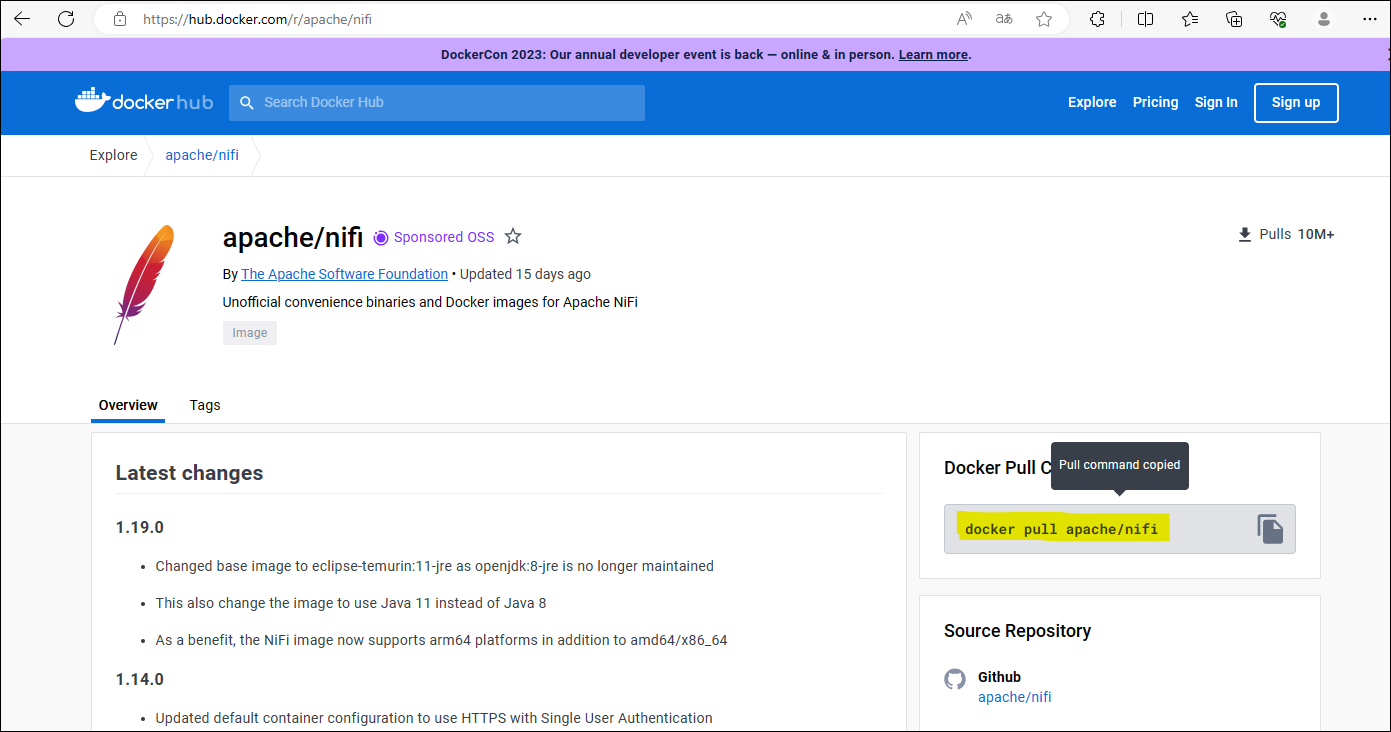





---


**1.1- Inicialização do container docker para o Apache Nifi.**

Para iniciar o container Docker do Apache Nifi, segui o modelo recomendado na documentação do Docker voltada para o Apache Nifi, que pode ser encontrada neste link: https://hub.docker.com/r/apache/nifi. No tópico **"Running. container,"**

Fiz algumas alterações, no modelo do container, como adicionando-o à rede que foi criada para o cluster HDFS e alterando a senha.\
**Executei o comando docker no terminal/linux.**


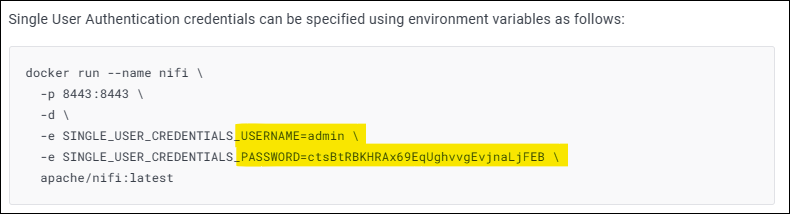
---

**1.2- Acessar o Localhost do Apache Nifi**

Após baixar a imagem do Apache Nifi via docker e iniciar o container. Acessei o
https://localhost:8443/nifi

**A** - Coloquei senha e usuario que foram configuradas no modelo do container na documentação do docker.

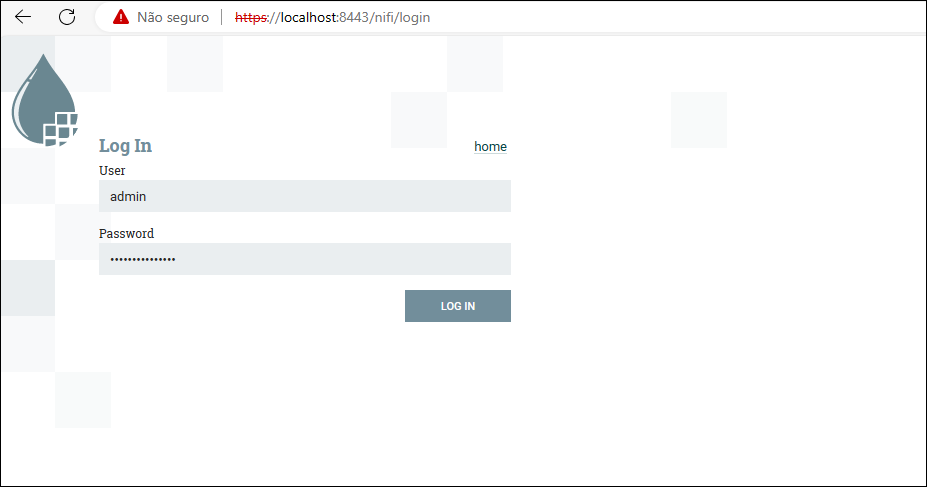


**B** - Ao acessar, me deparei com uma mensagem informando que minha conexão não era privada. Isso ocorreu porque o certificado que veio com o Nifi estava expirado. No entanto, não é um problema grave, então cliquei na opção "Avançado" para prosseguir.

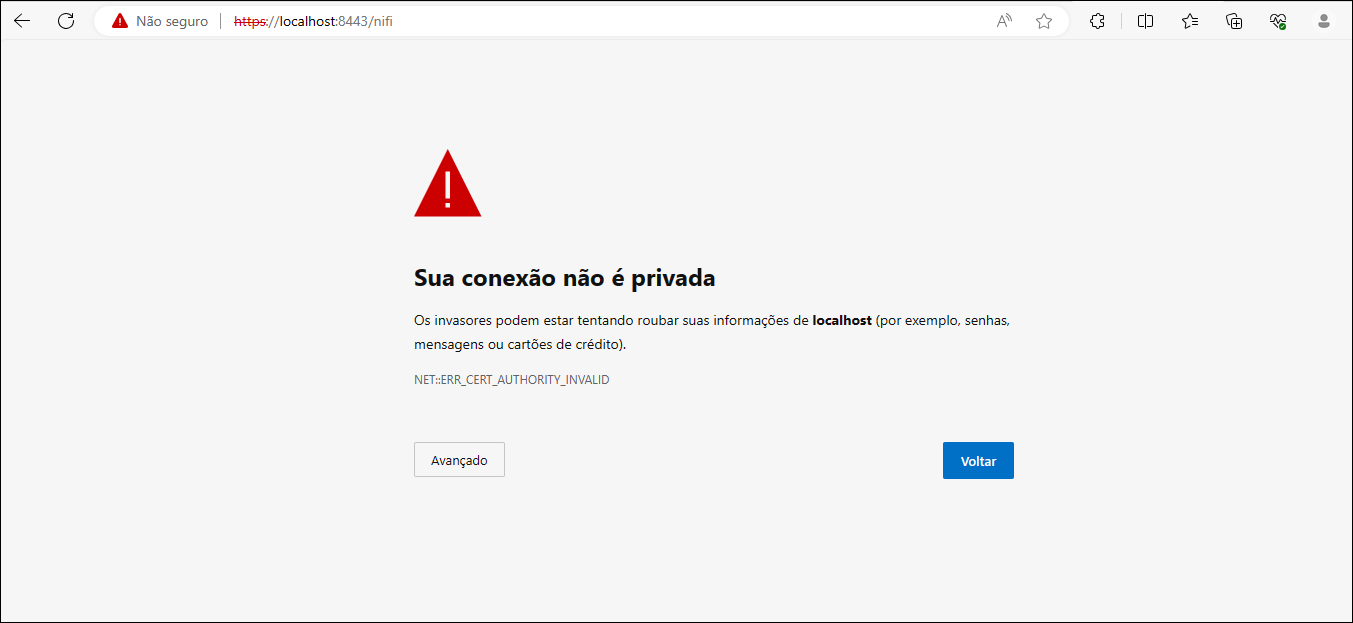


**C**- Cliquei em **continue até o localhost**

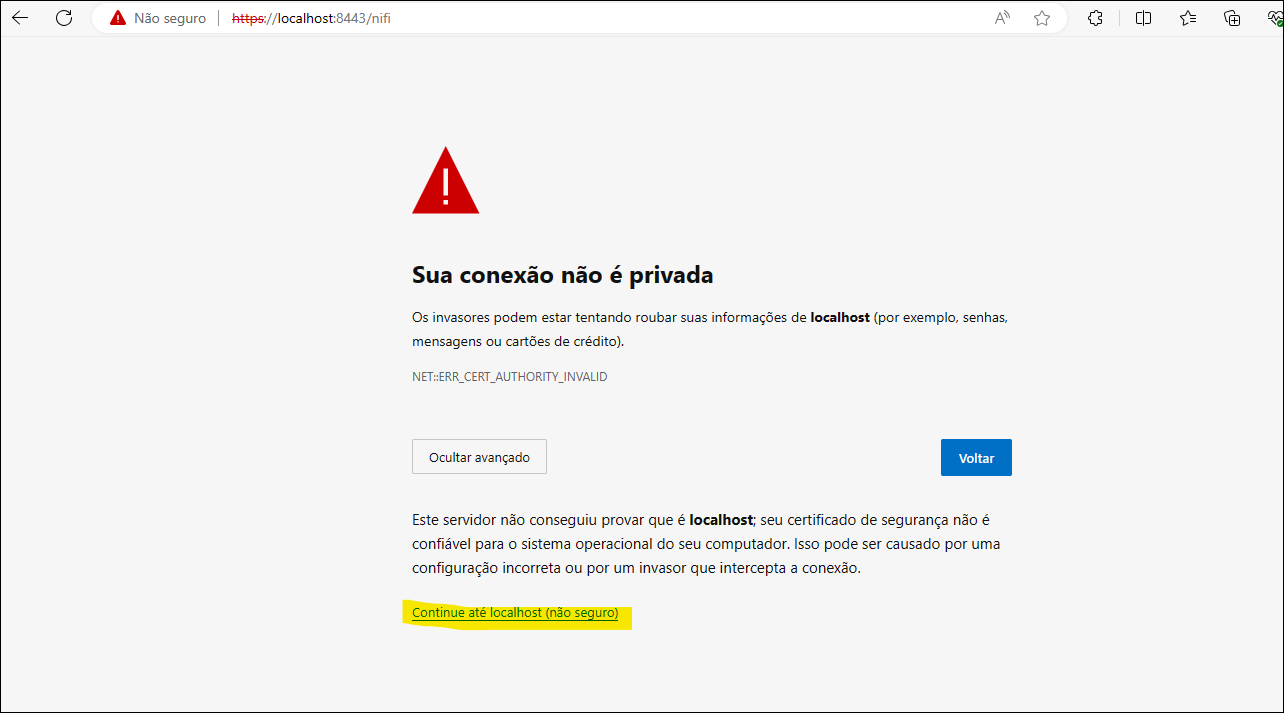

**D**- Acessei o Apache Nifi.

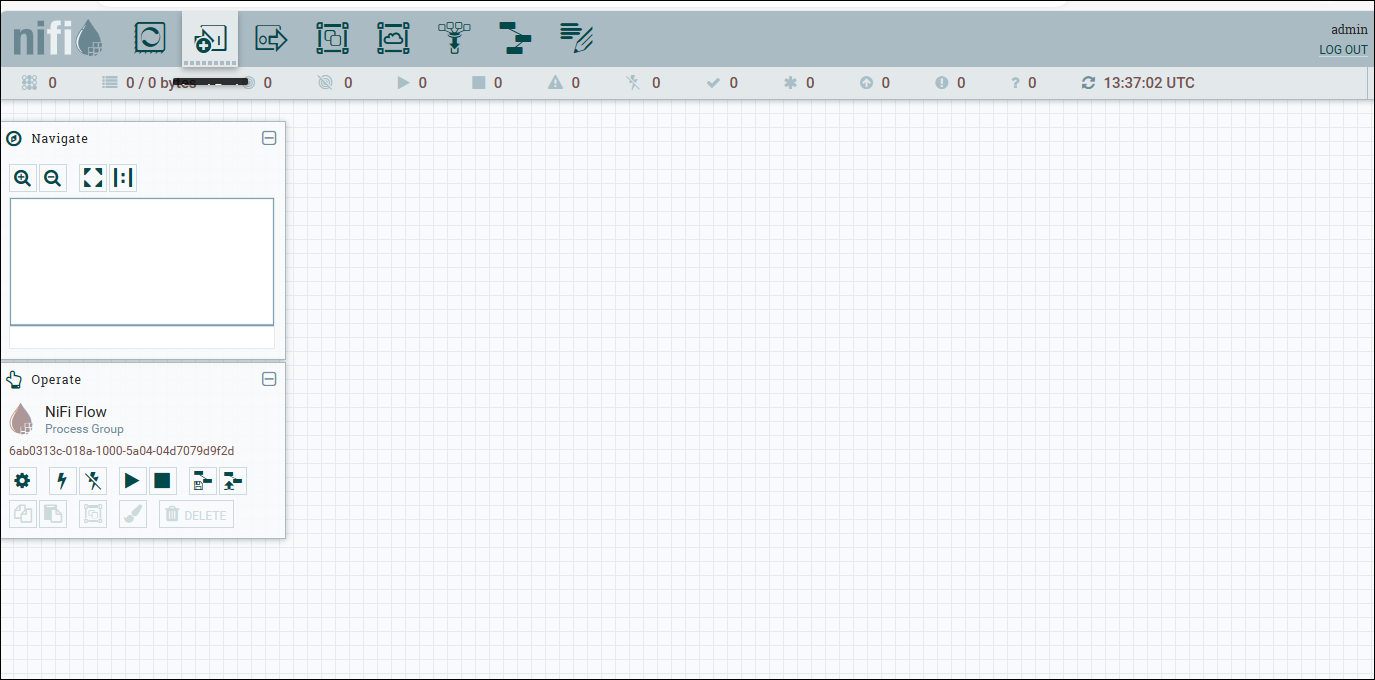


---

**2- Configurando os Processors no Apache Nifi**\
**GetFile**

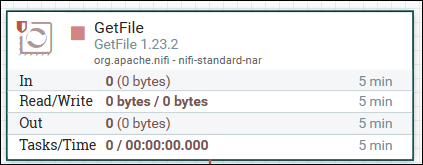

O primeiro processor que configurei para levar um arquivo de dados do servidor do Apache Nifi para uma pasta do HDFS foi o **GetFile.**

---

**A- Configuração das Propriedades Getfile**

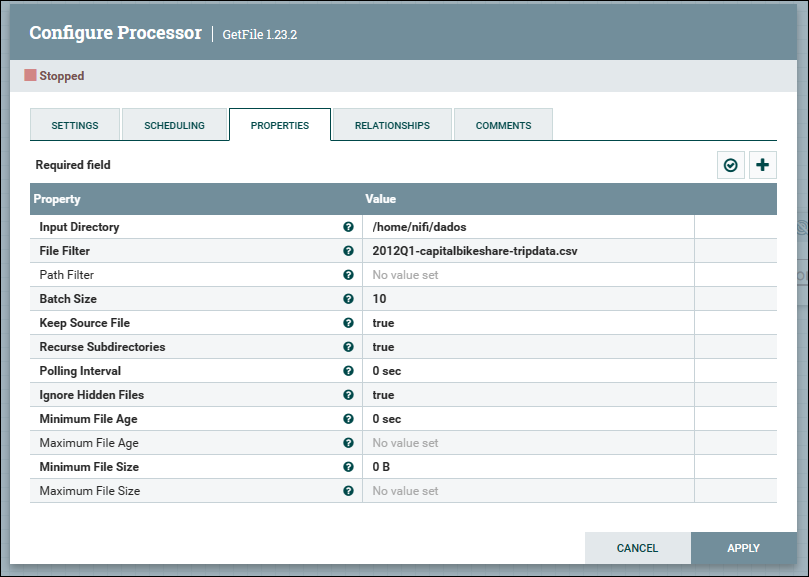


**B- Input Directory**

Em **Properties, Required field, Input Directory**, não coloquei o caminho da pasta como se fosse o da minha máquina local porque tinha um container rodando o Apache Nifi. Portanto, para esse primeiro processor, o caminho do Input Directory precisava ser o endereço de uma pasta dentro do servidor do Apache Nifi, já que estava trabalhando com um container e o Nifi estava dentro dessa máquina.Entrei no container do Nifi no modo bash e criei a pasta nesse caminho:
**/ home/nifi/dados. Dentro da pasta "dados",** realizei o download dos arquivos.


**C- File Filter**\
Em file Filter coloquei o nome dos aqruivo que quero que seja levado.

**D- Keep Source File**\
Marquei como "True" porque eu não quero que o Apache Nifi leia o arquivo na origem e o delete.

As demais configurações que estão em negrito que são obrigatorias eu deixei conforme a configuração Original.



---

**2- Configurando os Processors no Apache Nifi**\
**PutHdfs**

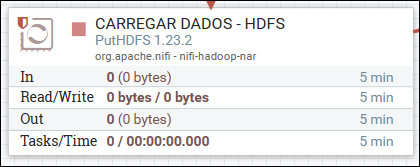

O segundo processor que configurei foi o PutHdfs, ele permite colocar um arquivo em um sistema de arquivos distribuído, como o Hadoop Distributed File System (HDFS).


---





**A- Configuração das Propriedades PutHDfs**

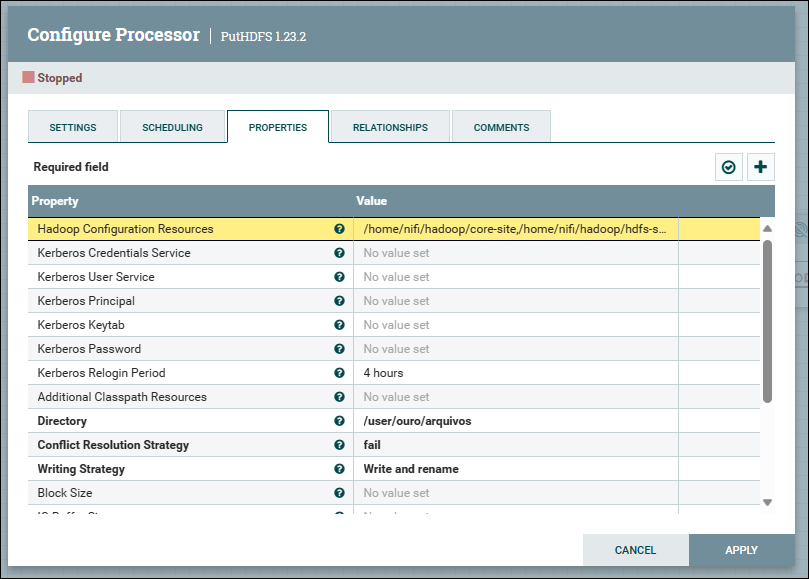

**B- Directory**

Em **Properties, Required field, Directory**\
Coloquei o caminho da pasta que criei dentro meu HDFS.
**/ user/ouro/arquivos,**.

**C- Hadoop Configuration Resources**\
Eu configurei o campo "Hadoop Configuration Resources" nas propriedades do Apache NiFi, mesmo que ele não esteja em negrito e não seja teoricamente obrigatório. Eu fiz isso porque, apesar de ter configurado o diretório do Hadoop, não disse ao Nifi qual era o servidor do Apache Hadoop, nem o nome do cluster HDFS, nem nenhuma outra informação sobre o servidor que está rodando meu cluster.

O Apache NiFi está rodando em uma máquina e o Apache Hadoop está rodando em outras três máquinas. Eu não entendi como o Apache NiFi iria encontrar o Apache Hadoop sem essa configuração. Para que o Nifi pudesse acessar o Hadoop, eu precisava dizer a ele onde estavam os arquivos de configuração que indicavam o caminho para o cluster, o nome do cluster, as pastas namenodes, ou seja, as informações do cluster.

Se eu deixasse esse campo em branco, o Apache Nifi iria buscar esses arquivos em uma lista chamada classe path, que é uma variável de ambiente com a classe Java. Mas a questão é: o classe path do container Nifi sabe onde está meu cluster? Por isso, a configuração desse item é necessária.

coloquei os arquivos com as configurações de variaveis e seus caminhos.

**/ home/nifi/hadoop/core-site,/home/nifi/hadoop/hdfs-site**

As demais configurações que estão em negrito que são obrigatorias eu deixei conforme a configuração Original.

---

**2.5-Verificando os status da rede dsa_dl_net**


---




**2.6- Criando e inicializando os containers do datanode1 e datanode2**

**A-**  Criei dois containers configurados como dois Datanodes. Esses containers estão conectados à rede "dsa_dl_net", juntamente com o container Namenode que foi criado na Sprint 01.


Por questões de segurança, os códigos dos dois containers, os Datanodes não foram disponibilizados. No entanto, eu segui a mesma estrutura abaixo. Executei esses containers via terminal dentro da pasta "binarios", onde estão os arquivos JDK e Hadoop.

os passos podem ser encontrados na documentação oficial do docker.\
https://docs.docker.com/engine/reference/commandline/run/

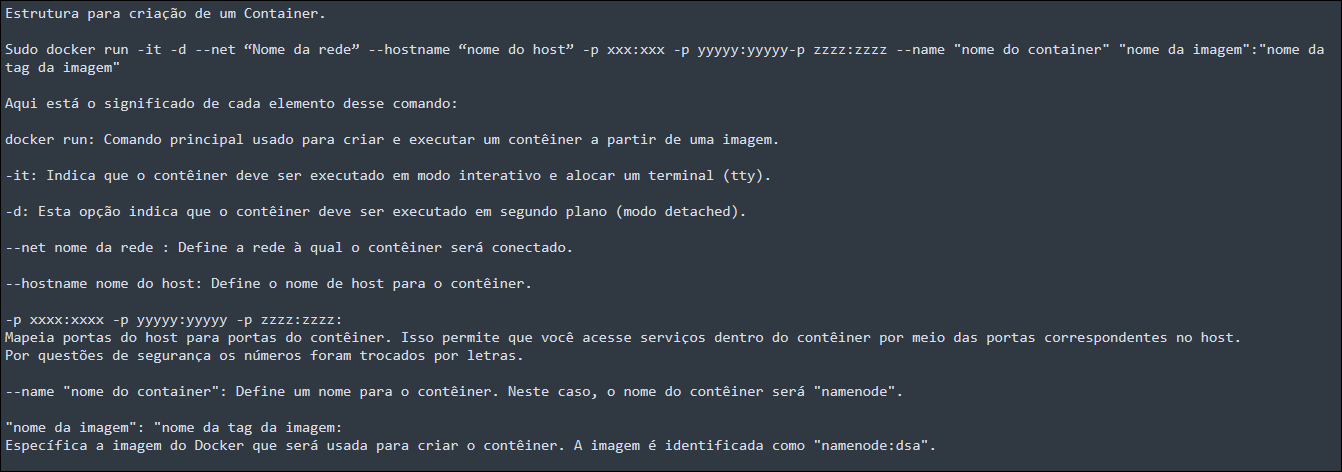

---

**B-** Após a criação dos containers "datanode1" e "datanode2", usei o comando "sudo docker ps -la" e o  gerenciador de containers Portainer.io para verificar o status dos três containers.

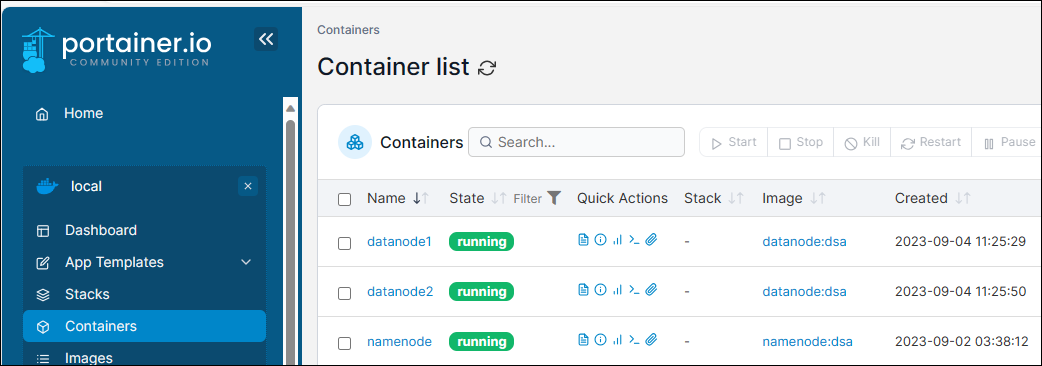

---


**2.7- Acessar os containers, datanode1 e datanode2\
Configura-los internamente**

Realizei essas configurações abaixo, pois são necessárias após subir os 02 containers, datanode 01 e datanode 02. Elas garantem  que o ambiente esteja configurado corretamente e pronto para ser usado no cluster Hadoop.

Configurações esperadas:

* Copiar a Chave shh;
* Iniciar o serviço ssh dentro de cada container dos **02 Datanodes**;
* Ajustar os privilégios dentro de cada container dos **02 Datanodes**;
* Criar uma pasta chamada ~/.ssh;
* Ajustar o privilégios da pasta ~/.ssh;
* Criar o arquivo ~/.ssh/authorized_keys;
* Ajustar os privilégios para o arquivo criado;
* Copiar a chave SSH que está no NameNode para cada Datanode;
* Iniciar o serviço dos 02 Datanodes;
* Acessar o navegador Localhost e verificar o Namenode e 02 Datandoes.


---

**A-Configurando Internamente os containers, Datanode1 e datanode2**\
**Copiando a chave SSh.**

Para Esse processo, eu acessei iternamente o container Namenode através dos comandos na imagem.\
Dentro do container acessi a pasta .ssh/\
E utilizei o comando cat.

O comando "cat" no arquivo "authorized_keys" lista a chave pública que permite o acesso a esse sistema remotamente sem a necessidade de fornecer uma senha. Após pressionar "Enter", eu copiei minha chave, pois a usarei nos datanodes para conceder a eles permissões de acesso.

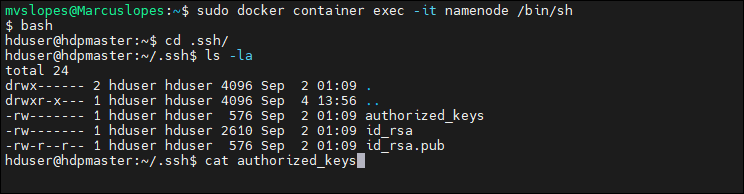


---

**B-Configurando Internamente os containers, Datanode1 e datandoe2**\
**Service ssh restart**

A instrução "sudo service ssh restart" é usada para reiniciar o serviço SSH dentro de um container. Utilizei na configuração do Namenode e agora vou utilizar na configuração do datanode1 e datanode2. Isso é necessário porque, durante a construção do container e da imagem, foram realizadas configurações relacionadas ao SSH, como a geração de chaves SSH e a configuração do acesso sem senha. Portanto, executar "sudo service ssh restart" é importante para garantir que o SSH esteja configurado e funcionando corretamente dentro de cada container, o que pode ser necessário para acessar e gerenciar o contêiner remotamente.

Entrei em cada container, através do comando.\
***sudo docker container exec -it nome do container/bin/sh***, Ou posso usar o container console do portainer.io

Usando o comando acima, ao entrar em cada container digite bash e em seguida o comando\
***sudo service ssh restart***

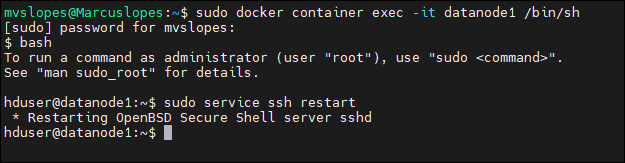


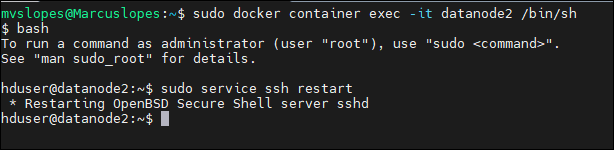


**Observação: Fiz esse processo para o datanode1 e para o datanode2**


---



**C- Configurando Internamente os Containers, Datanode1 e Datanode2**\
**Ajuste dos privilégios**

Fiz os ajustes de privilégios para conceder ao usuário "hduser" controle total sobre os diretórios relevantes dentro dos containers. Isso é fundamental para garantir que o ambiente Hadoop funcione corretamente, pois o Hadoop requer permissões específicas para acessar e gerenciar seus diretórios de trabalho, armazenamento e outros recursos.

Executados os comandos abaixo:

***sudo chown -R hduser:hduser/home/hduser/jdk***\
***sudo chown -R hduser:hduser/home/hduser/hadoop***

Resultados:
Troca do usuario root, para Hdusee em jdk e Hadoop

**Datanode 01 - Antes**

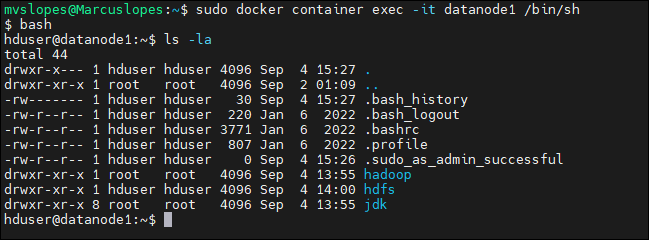


**Datanode 01 - Depois**

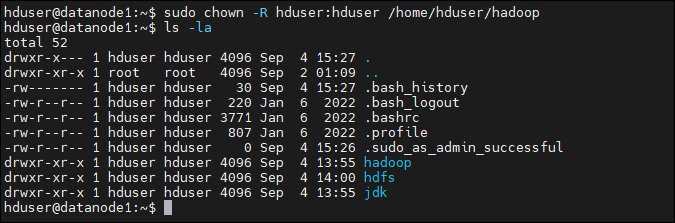

**Observação: Repeti esse mesmo processo para o datanode2**

---


**D- Configurando Internamente o Containers, Datanode1 e Datanode2**

dentro do container datanode1 executar os comandos abaixo:

* Criar uma pasta chamada ~/.ssh;\
comando: sudo mkdir ~/.ssh

* Ajustar os privilégios da pasta criada;\
sudo chown -R hduser:hduser /home /hduser /.ssh

* Criar o arquivo ~/.ssh/authorized_keys;\
sudo touch ~/.ssh/authorized_keys

* Ajustar os privilégios para o arquivo criado;\
sudo chmod 600 ~/.ssh/authorized_keys

**Observação: Repedi esse mesmo processo para o datanode2**

---



**E- Configurando internamente os containers, Datanode1 e Datanode2**\
**Copie a chave que está em /home / hduser/.ssh/authorized_keys do NameNode\
 Coloque em cada datanode.**

* Acessei o Datanode1;
* Digitei vi authorized_keys para editar o arquivo criado;
* Abri o editor de texto do vi;
* DigiteI a tecla i para autorizar a ediação de texto;
* Colei  a chave ssh que copiei do Namenode;
* Digitei Esc para sair da edição;
* :W para salvar a edição;
* :Q Para sair da edição

Chave copiada para Datanode1





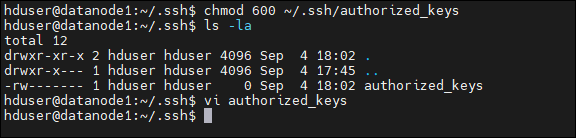

***Obs: Repeti esse mesmo processo para o Datanode2***

---

**F-Iniciar o container datanode1 e datanode2**\

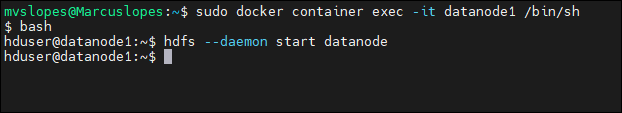






***Obs: Repeti esse mesmo processo para o Datanode2***

**2.7- Acessando o Localhost**\
**Verificar status do Namenode e o datanode1 e datanode2**


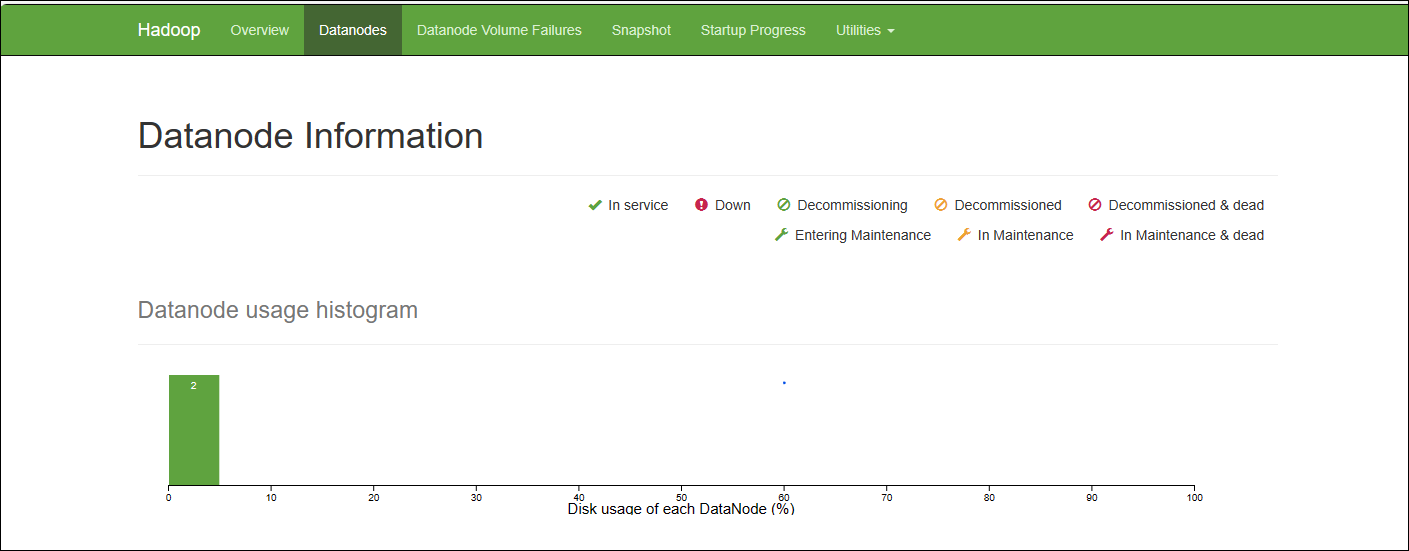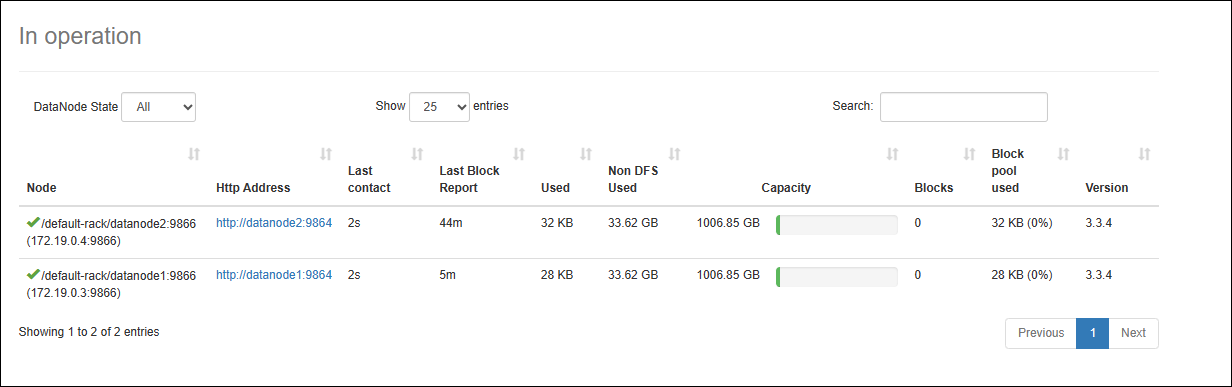




**Sprint 02\
Finalizada**

Nessa sprint, entreguei a montagem da infraestrutura do Data Lake em um cluster Hadoop HDFS. Esse cluster possui um NameNode e dois DataNodes, o DataNode1 e o DataNode2. O Data Lake está pronto para receber a estrutura de armazenamento, como a criação de pastas e outros recursos.

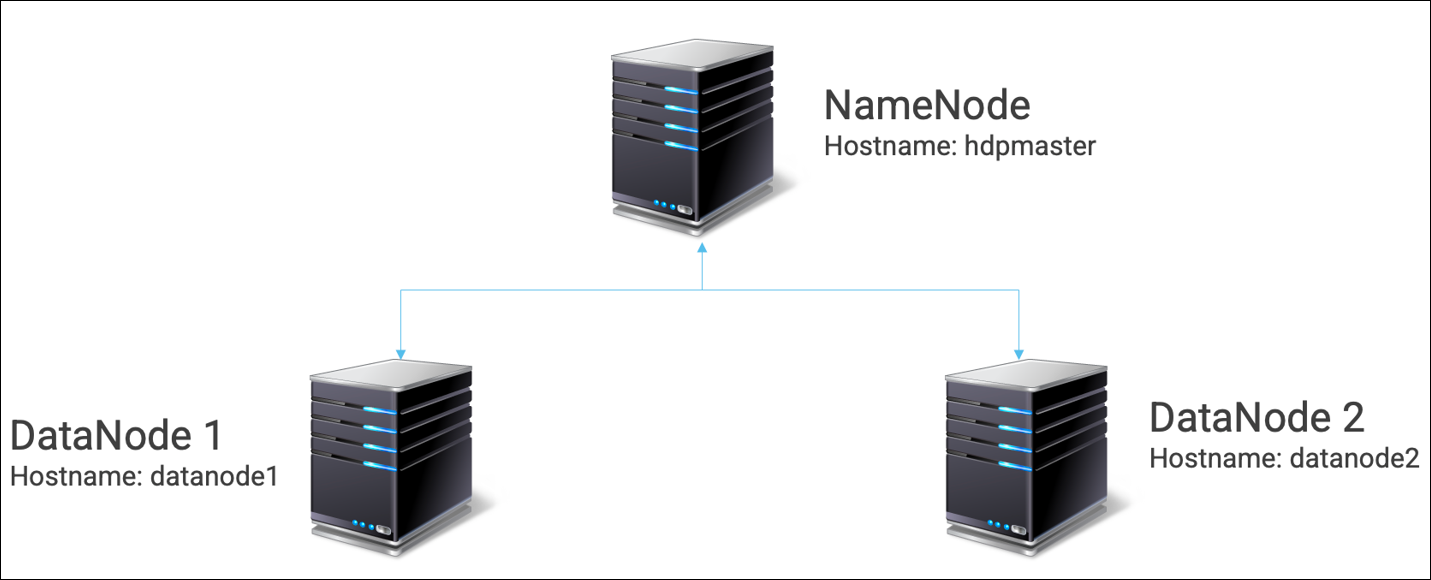